In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bidict import bidict
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [30]:
ENCODER = bidict({
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
    'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
    'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18,
    'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24,
    'Y': 25, 'Z': 26
})

In [31]:
labels = np.load('../data/labels.npy')
labels = np.array([ENCODER[x] for x in labels])
labels.shape

(267,)

In [32]:
imgs = np.load('../data/images.npy')
imgs = imgs.astype("float32") / 255
imgs.shape

(267, 50, 50)

In [84]:
# plt.figure()
# plt.imshow(imgs[0])
# plt.grid(False)
# plt.show()

In [33]:
imgs = np.expand_dims(imgs, -1)

In [34]:
labels, imgs = shuffle(labels, imgs)
split = .75

labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [35]:
batch_size = 16
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(50, 50, 1)),
    layers.Conv2D(256, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(512, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(1024, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation='softmax')
])

In [36]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [37]:
model.fit(imgs_train,
          labels_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(imgs_test, labels_test),
          callbacks=[early_stopping])

Epoch 1/20
13/13 [==============================] - 25s 2s/step - loss: 3.3697 - accuracy: 0.0300 - val_loss: 3.2708 - val_accuracy: 0.0896
Epoch 2/20
13/13 [==============================] - 27s 2s/step - loss: 3.0961 - accuracy: 0.1550 - val_loss: 2.7238 - val_accuracy: 0.1343
Epoch 3/20
13/13 [==============================] - 22s 2s/step - loss: 1.4838 - accuracy: 0.5900 - val_loss: 1.4210 - val_accuracy: 0.5821
Epoch 4/20
13/13 [==============================] - 20s 2s/step - loss: 0.7502 - accuracy: 0.8150 - val_loss: 0.5736 - val_accuracy: 0.8507
Epoch 5/20
13/13 [==============================] - 20s 2s/step - loss: 0.1714 - accuracy: 0.9600 - val_loss: 0.3898 - val_accuracy: 0.8657
Epoch 6/20
13/13 [==============================] - 21s 2s/step - loss: 0.1046 - accuracy: 0.9550 - val_loss: 0.3805 - val_accuracy: 0.8955
Epoch 7/20
13/13 [==============================] - 21s 2s/step - loss: 0.0523 - accuracy: 0.9850 - val_loss: 0.2913 - val_accuracy: 0.9104
Epoch 8/20
13/13 [==

In [38]:
labels_pred = np.argmax(model.predict(imgs_test), axis=-1)

3/3 [==============================] - 1s 220ms/step


In [39]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

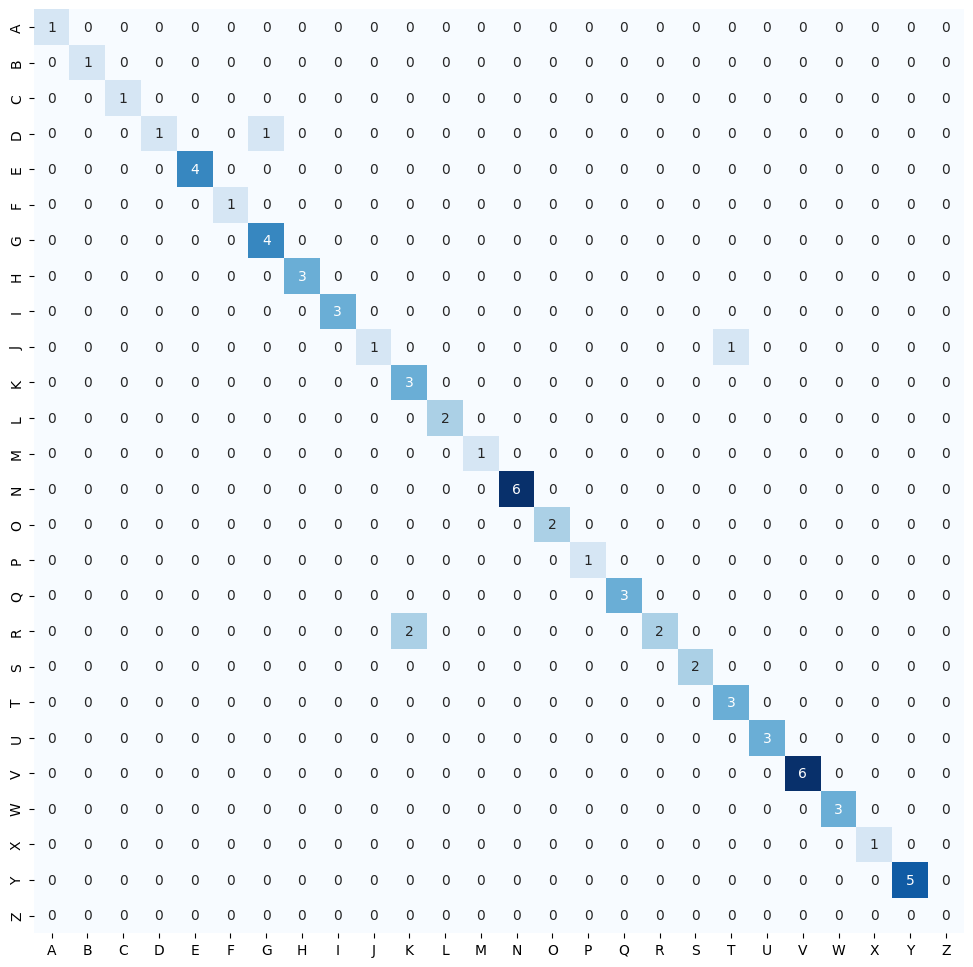

In [40]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues", xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [43]:
model.save('../letter.model')

INFO:tensorflow:Assets written to: ../letter.model\assets


INFO:tensorflow:Assets written to: ../letter.model\assets
